In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-years-diabetes-dataset/diabetes.csv


# About Dataset
Data Set Information
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:
*  It is an inpatient encounter (a hospital admission).
*  It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
*  The length of stay was at least 1 day and at most 14 days.
*  Laboratory tests were performed during the encounter.
*  Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

In [2]:
# Load libraries
import numpy as np 
import pandas as pd 
import sys
import os


import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate

In [3]:
df = pd.read_csv("../input/10-years-diabetes-dataset/diabetes.csv")

In [4]:
df.head(2)

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

## Drop some unwanted features

In [6]:
df = df.drop(columns = ['id','weight', 'encounter_id', 'patient_nbr','admission_type_id', 'discharge_disposition_id', 'admission_source_id','payer_code' ] )

## Analyze Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   time_in_hospital          101766 non-null  int64 
 4   medical_specialty         101766 non-null  object
 5   num_lab_procedures        101766 non-null  int64 
 6   num_procedures            101766 non-null  int64 
 7   num_medications           101766 non-null  int64 
 8   number_outpatient         101766 non-null  int64 
 9   number_emergency          101766 non-null  int64 
 10  number_inpatient          101766 non-null  int64 
 11  diag_1                    101766 non-null  object
 12  diag_2                    101766 non-null  object
 13  diag_3                    101766 non-null  object
 14  numb

* There has no null value in data
* This only contain object and integer type of data

In [8]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## Feature Engineering

Feature engineering is one of the most crucial parts of building a good machine learning model. If we have useful features, the model will perform better. There are many situations where you can avoid large, complicated models and use simple models with crucially engineered features. We must keep in mind that feature engineering is something that is done in the best possible manner only when you have some knowledge about the domain of the problem and depends a lot on the data in concern. However, there are some general techniques that you can try to create features from almost all kinds of numerical and categorical variables. Feature engineering is not just about creating new features from data but also includes different types of normalization and transformations.

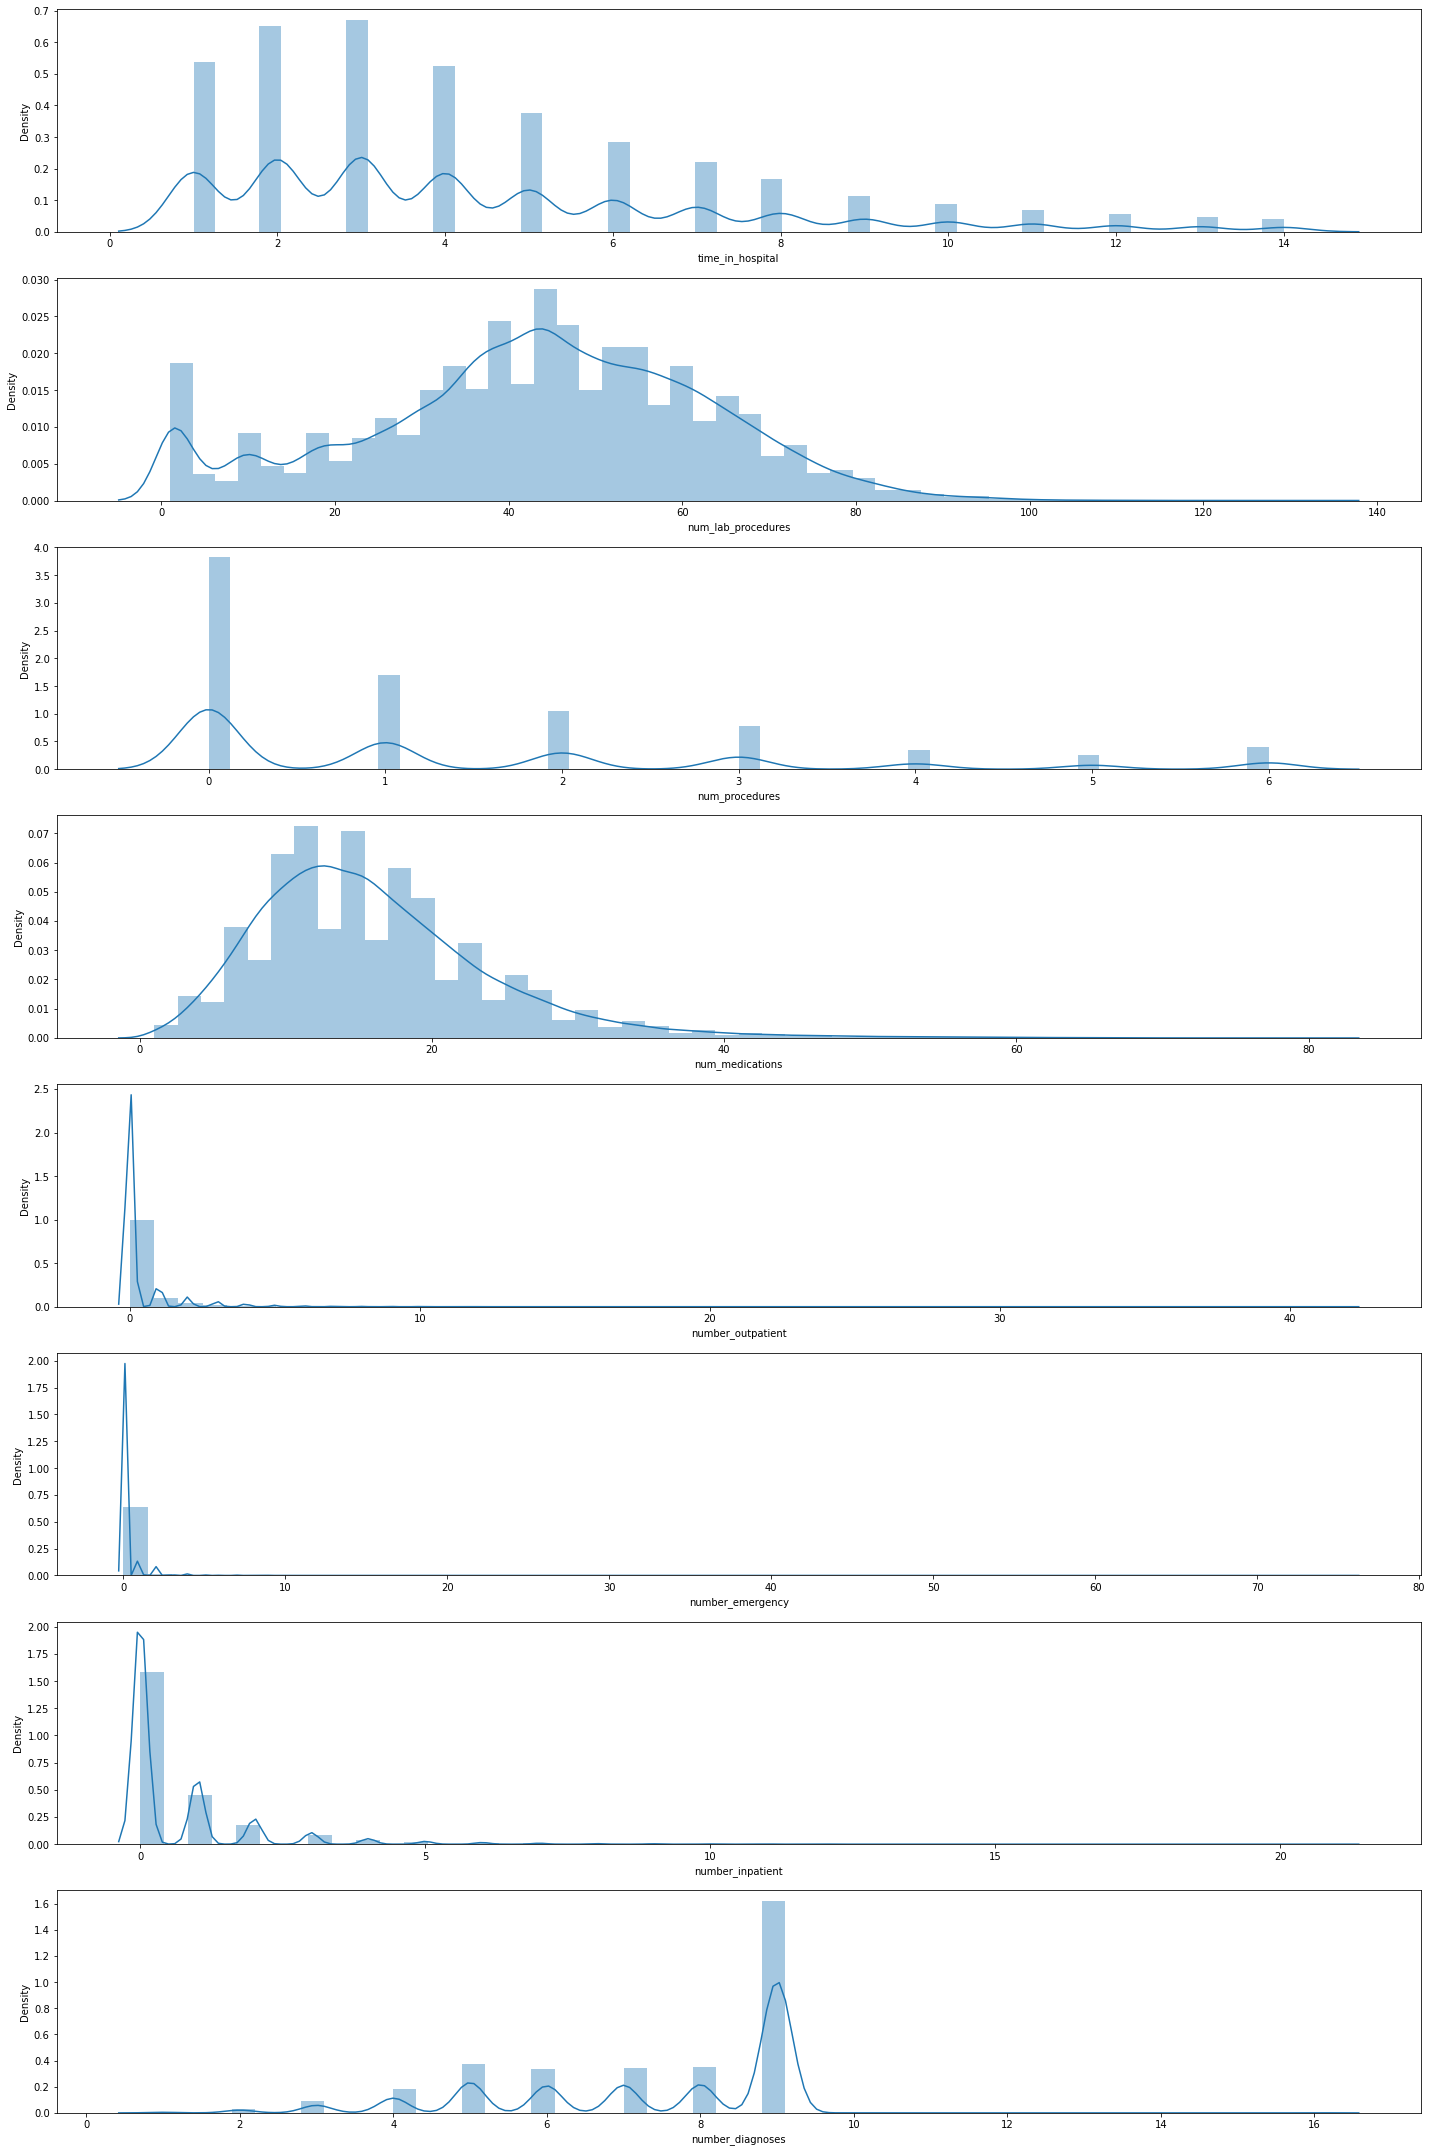

In [9]:
# Numerical features
num_feats=[col for col in df.columns if df[col].dtypes != 'object']

# Plot distribution of numerical columns
fig=plt.figure(figsize=(20,30))
for i, col in enumerate(num_feats):
    plt.subplot(len(num_feats),1,1*i+1)
    sns.distplot(df[col])
    
fig.tight_layout()
plt.show()

### Feature selection

When you are done creating hundreds of thousands of features, it’s time for selecting a few of them. Well, we should never create hundreds of thousands of useless features. Having too many features pose a problem well known as the curse of dimensionality. If you have a lot of features, you must also have a lot of training samples to capture all the features. What’s considered a “lot” is not defined correctly and is up to you to figure out by validating your models properly and checking how much time it takes to train your models.

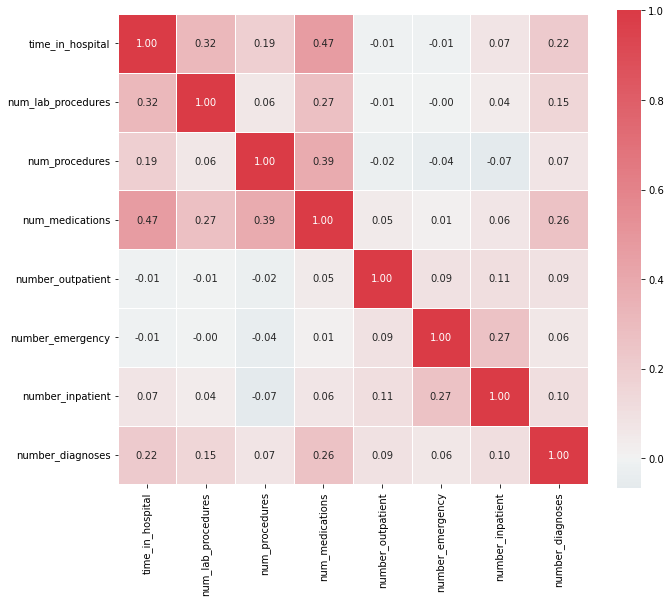

In [10]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

There is no highly corrolated feature in this data set.

### Cleaning Data

In [11]:
# convert range to interger value in age column
df['age'] = df.age.str.extract('(\d+)-(\d+)').astype('int').mean(axis=1).astype('int')

# replace '?' into None 
df = df.replace(to_replace ="?",value ="None")

### Encoding the categorical data

In [12]:
from sklearn.preprocessing import LabelEncoder
# get only categorical columns list
cat_feats= [col for col in df.columns if df[col].dtypes == 'object']

# encode the categorical features 
encoder = LabelEncoder()
df[cat_feats] = df[cat_feats].apply(encoder.fit_transform)

### Split into Train and Validation Set

We usually devide the data to train and test set. We will not touch test set until the end of the computation and the final perpormance evaluation. Then, we can devide the train set to train and validation sets. We use the validation data set to tune the model.

In [13]:
from sklearn.model_selection import train_test_split

y = df['diabetesMed']
X = df.drop(columns = 'diabetesMed')

# split data into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Creation
To briefly mention the algorithms we will use,

Logistic Regression: Unlike linear regression which uses Least Squares, this model uses Maximum Likelihood Estimation to fit a sigmoid-curve on the target variable distribution. The sigmoid/logistic curve is commonly used when the data is questions had binary output.

LinearDiscriminantAnalysis: LinearDiscriminantAnalysis is a dimensionality reduction technique that is commonly used for supervised classification problems. It is used for modelling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space.

K-Nearest Neighbors (KNN): KNN works by selecting the majority class of the k-nearest neighbours, where the metric used is usually Euclidean distance. It is a simple and effective algorithm but can be sensitive by many factors, e.g. the value of k, the preprocessing done to the data and the metric used.

Random Forest (RF): RF is a reliable ensemble of decision trees, which can be used for regression or classification problems. Here, the individual trees are built via bagging (i.e. aggregation of bootstraps which are nothing but multiple train datasets created via sampling with replacement) and split using fewer features. The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data. It works well with both continuous & categorical data.

Gaussian Naive Bayes (NB): Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. We have explored the idea behind Gaussian Naive Bayes along with an example. Before going into it, we shall go through a brief overview of Naive Bayes. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier.

AdaBoost (AB): AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Gradient Boosting (GB): Gradient Boosting an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss.

ExtraTreesClassifier (ET): ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.

In [14]:
def BasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    
    return basedModels

In [15]:
def BasedLine(X_train, y_train, X_valid, y_valid, models):
    # Test options and evaluation metric
    scoring = 'accuracy'
    results = []
    names = []
    scores = []
    data = []
    for name, model in models:
        model.fit(X_train, y_train)
        cv_results = cross_val_score(model, X_train, y_train, scoring=scoring)
        score = model.score(X_valid, y_valid)
        results.append(cv_results)
        names.append(name)
        scores.append(score)
        data.append([name,cv_results.mean(),score])
    print(tabulate(data, headers=["Model", "CV Results", "Model Scores"], tablefmt='orgtbl'))
        
    return names, results, scores

### Train the Model and get metrics

In [16]:
models = BasedModel()
names,results, scores = BasedLine(X_train, y_train,X_valid, y_valid, models)

| Model   |   CV Results |   Model Scores |
|---------+--------------+----------------|
| LR      |     0.813787 |       0.808146 |
| LDA     |     0.959957 |       0.95991  |
| KNN     |     0.730826 |       0.737103 |
| RF      |     0.999361 |       0.99941  |
| NB      |     0.999939 |       1        |
| AB      |     1        |       1        |
| GBM     |     0.999288 |       0.999067 |
| ET      |     0.999902 |       0.999705 |


Here is the CV results and model scores of each model. Some algorithm doing so good, but the tree based algorithm are getting overfit on this data.